# Importing Libraries

In [ ]:
!pip install -r ../requirements.txt

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore') #Ignores warning messages

# Loading the Dataset

In [4]:
df = pd.read_csv(r"../dataset//credit_risk_dataset.csv") #loading the dataset
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Basic Cleaning
## 1) Dealing with duplicates

In [3]:
print(df.duplicated().sum()) #sum of the duplicates presnt in the dataset

165


In [4]:
df = df.drop_duplicates() #dropping the duplicates
print(df.duplicated().sum()) 

0


## 2) Mean Imputation

In [5]:
pd.isnull(df).sum()  #Checking count of null values in df

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
mean_loan_int_rate = df['loan_int_rate'].mean() #Filling missing values in the column loan_int_rate using Mean
df['loan_int_rate'].fillna(mean_loan_int_rate, inplace=True) #Filling them with mean value
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## 3) Dropping Missing values

In [7]:
pd.isnull(df).sum() 

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             887
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [8]:
df.dropna(inplace=True) #dropping column 'person_emp_length'

In [9]:
pd.isnull(df).sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## 4) Dealing with dtype conversions

In [10]:
df.info() #Displays each column, its count and datatype

<class 'pandas.core.frame.DataFrame'>
Index: 31529 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31529 non-null  int64  
 1   person_income               31529 non-null  int64  
 2   person_home_ownership       31529 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 31529 non-null  object 
 5   loan_grade                  31529 non-null  object 
 6   loan_amnt                   31529 non-null  int64  
 7   loan_int_rate               31529 non-null  float64
 8   loan_status                 31529 non-null  int64  
 9   loan_percent_income         31529 non-null  float64
 10  cb_person_default_on_file   31529 non-null  object 
 11  cb_person_cred_hist_length  31529 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [11]:
df[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']] = df[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']].astype('category') #converting the datatype of the columns which are incorrect in the dataframe to int
df[['person_emp_length']] = df[['person_emp_length']].astype(int) #converting the datatype of the columns which are incorrect in the dataframe to int
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


## 5) Checking for Nan values

In [12]:
df.isna().sum() #checking for NaN values

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Exploratory Data Analysis (EDA)

In [13]:
df.info() #Displays each column, its count and datatype

<class 'pandas.core.frame.DataFrame'>
Index: 31529 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  31529 non-null  int64   
 1   person_income               31529 non-null  int64   
 2   person_home_ownership       31529 non-null  category
 3   person_emp_length           31529 non-null  int32   
 4   loan_intent                 31529 non-null  category
 5   loan_grade                  31529 non-null  category
 6   loan_amnt                   31529 non-null  int64   
 7   loan_int_rate               31529 non-null  float64 
 8   loan_status                 31529 non-null  int64   
 9   loan_percent_income         31529 non-null  float64 
 10  cb_person_default_on_file   31529 non-null  category
 11  cb_person_cred_hist_length  31529 non-null  int64   
dtypes: category(4), float64(2), int32(1), int64(5)
memory usage: 2.2 MB


In [14]:
df.describe() #Central tendency(mean, count, standard deviation,quartiles,etc...) of each column

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31529.000000,3.152900e+04,31529.00000,31529.000000,31529.000000,31529.000000,31529.000000,31529.000000
mean,27.759238,6.670447e+04,4.79051,9665.152717,11.042684,0.215928,0.169660,5.816201
std,6.366137,6.245756e+04,4.14549,6336.661842,3.071701,0.411471,0.106324,4.064782
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.00000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.00000,8000.000000,11.017265,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.00000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
df.nunique() #displaying the count of unique values from each column in the df

person_age                      58
person_income                 4130
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      749
loan_int_rate                  349
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

## (iv) Plotting characteristics of features

In [16]:
# sns.pairplot(data= df, hue = 'loan_status') #Plotting features with respect to target variable 'loan_status' using Pair Plot
# plt.show()

## (v) Histogram plot for the Features and the Target Variable 'loan_status'

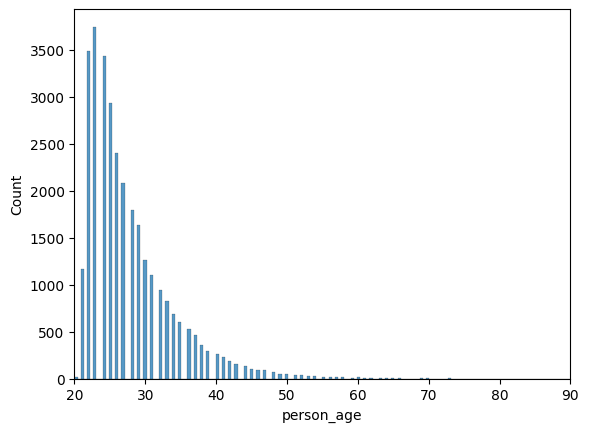

In [17]:
sns.histplot(data= df, x ='person_age', multiple = 'stack') #Histogram with person_age 
plt.xlim(20, 90) # X range limit
plt.show()

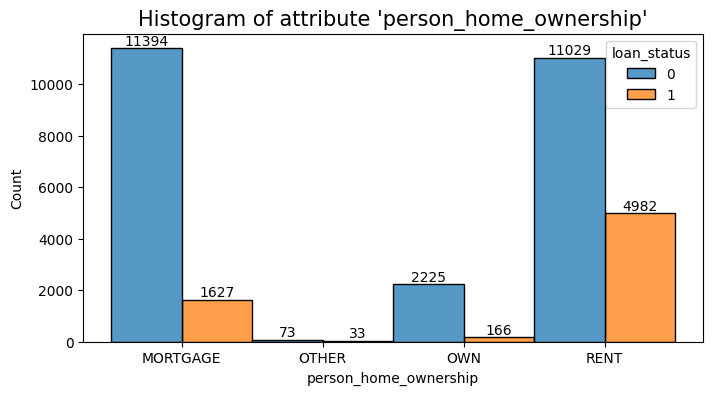

In [18]:
plt.figure(figsize=(8, 4)) #Setting figure size
plt.title("Histogram of attribute 'person_home_ownership'",fontsize=15)
ax = sns.histplot(data=df,x ='person_home_ownership',hue ='loan_status',multiple = 'dodge')
for container in ax.containers: #Printing labels for each stack of the plot
    ax.bar_label(container)
plt.show()


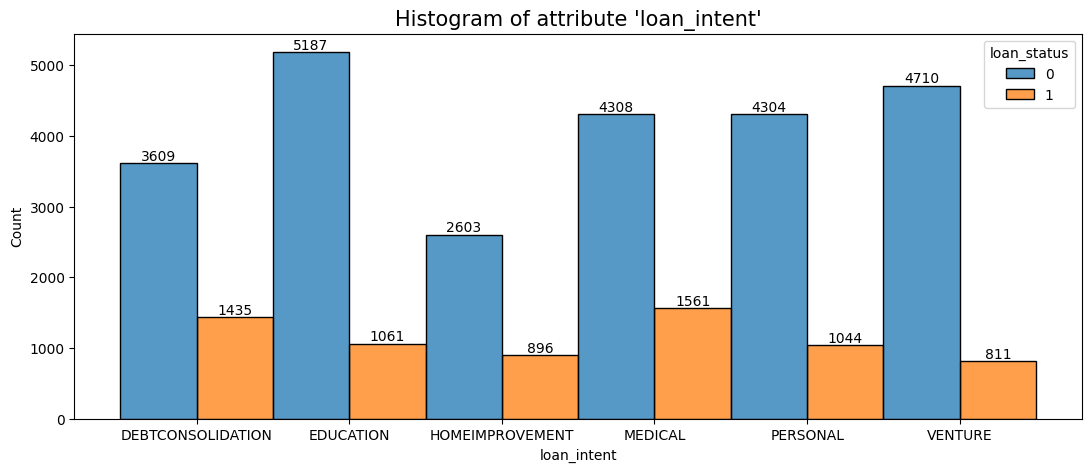

In [19]:
plt.figure(figsize=(13, 5))  #Setting figure size
plt.title("Histogram of attribute 'loan_intent'",fontsize=15)
ax = sns.histplot(data=df,x ='loan_intent',hue ='loan_status',multiple = 'dodge',)
for container in ax.containers: #Printing labels for each stack of the plot
    ax.bar_label(container)
plt.show()

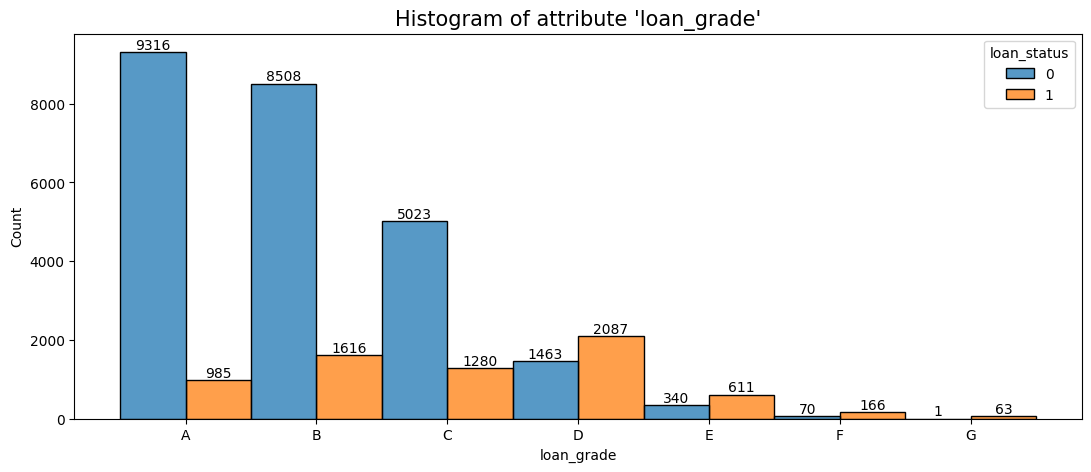

In [20]:
plt.figure(figsize=(13, 5))
plt.title("Histogram of attribute 'loan_grade'",fontsize=15)
ax = sns.histplot(data=df,x ='loan_grade',hue ='loan_status',multiple = 'dodge')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## (vi) KDE Plot for Numerical Features

In [21]:
#Function to plot KDE plot given the column name (numerical column)
def kde_plots_for_numerical_features(column_names,rows=4):
    
    i = 0
    loan_status_1 = df.loc[df['loan_status'] == 1] #df with loan_status = 1
    loan_status_0 = df.loc[df['loan_status'] == 0] #df with loan_status = 0

    plt.figure()
    fig, ax = plt.subplots(rows,2,figsize=(12,5*rows)) # Creating subplots 

    for feature in column_names:
        i += 1
        plt.subplot(rows,2,i)
        sns.kdeplot(loan_status_1[feature].values, bw=0.5,label="Loan Status = 1")
        sns.kdeplot(loan_status_0[feature].values, bw=0.5,label="Loan Status = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

<Figure size 640x480 with 0 Axes>

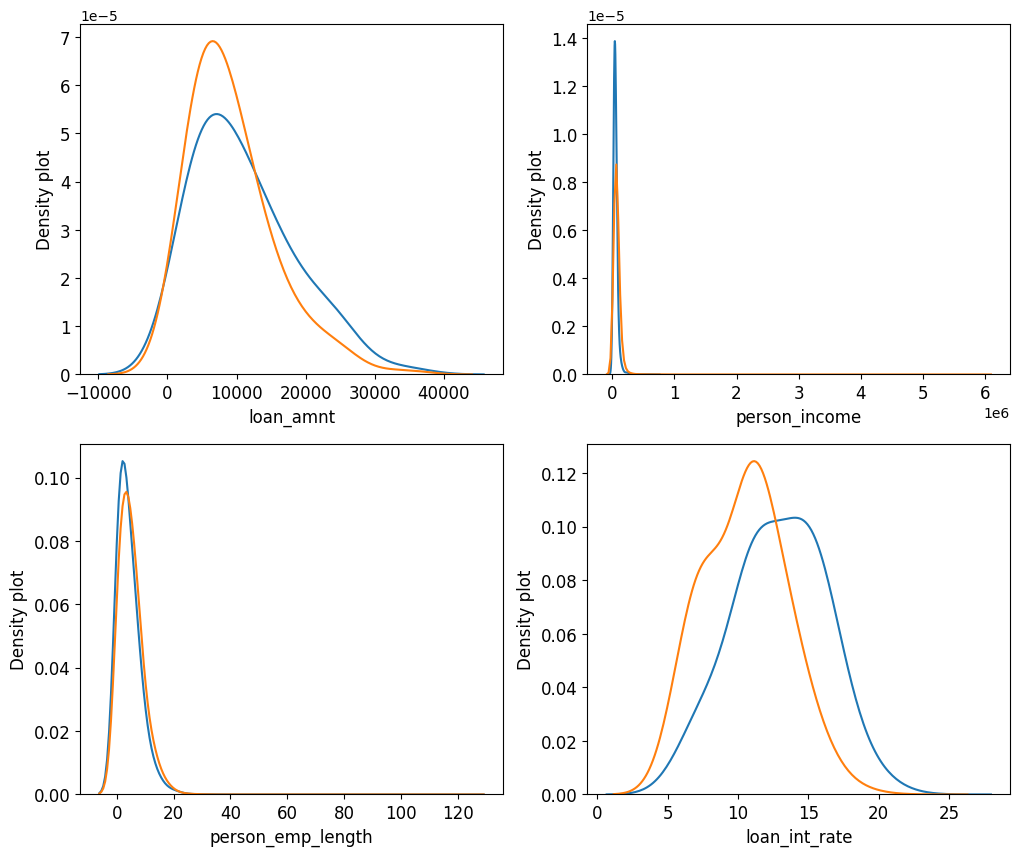

In [22]:
# Calling the function for numerical columns
column_names = ['loan_amnt','person_income', 'person_emp_length','loan_int_rate']
kde_plots_for_numerical_features(column_names,rows=2)

## (vii) Pie Plot for Target Distribution

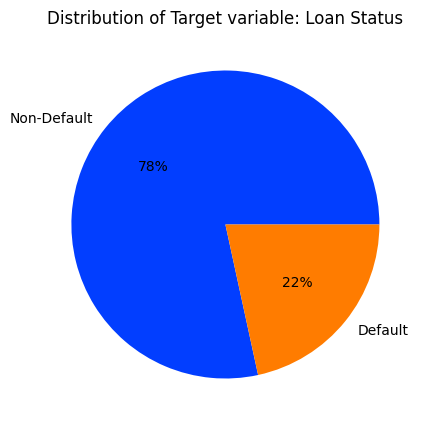

In [23]:
#Plotting distribution using value_counts of loan_status
plt.figure(figsize=(13, 5))
plt.title("Distribution of Target variable: Loan Status")
plt.pie(df['loan_status'].value_counts(), labels=['Non-Default','Default'], colors=sns.color_palette('bright'), autopct='%.0f%%') 
plt.show()

## (viii) Distribution of Numerical Features with Categorical Features - Multivariate Analysis

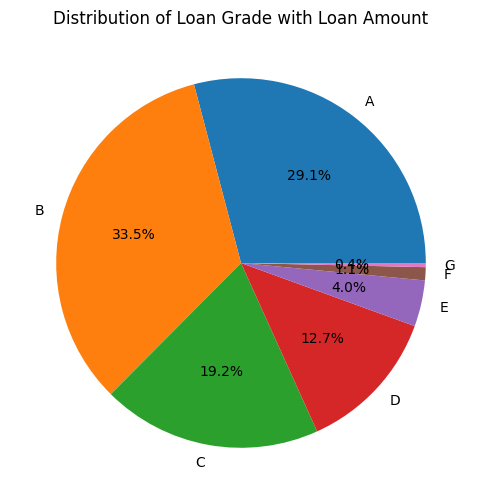

In [24]:
X = df.groupby(['loan_grade'])['loan_amnt'].sum().reset_index() #Extracting only two columns by grouping
plt.figure(figsize=(6, 6))
plt.pie(X['loan_amnt'], labels=X[['loan_grade']].apply(lambda x: '-'.join(x), axis=1), autopct='%1.1f%%')
plt.title('Distribution of Loan Grade with Loan Amount') 
plt.show()

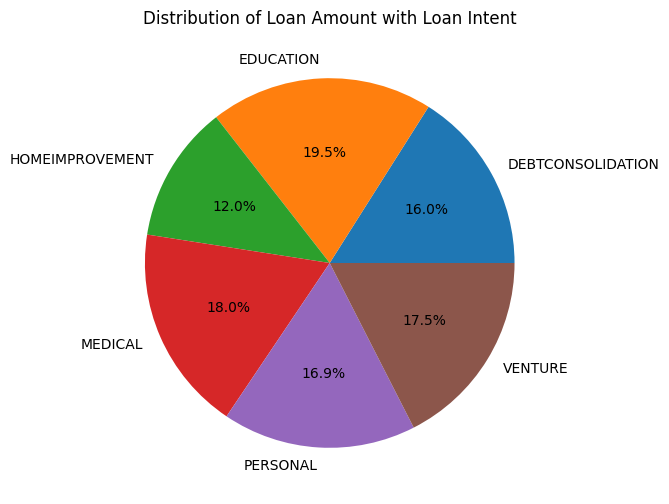

In [25]:
X = df.groupby(['loan_intent'])['loan_amnt'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(X['loan_amnt'], labels=X[['loan_intent']].apply(lambda x: '-'.join(x), axis=1), autopct='%1.1f%%')
plt.title('Distribution of Loan Amount with Loan Intent')
plt.show()

## (ix) Scatter Plot to check that the person will be able to pay his loan at that interest rate

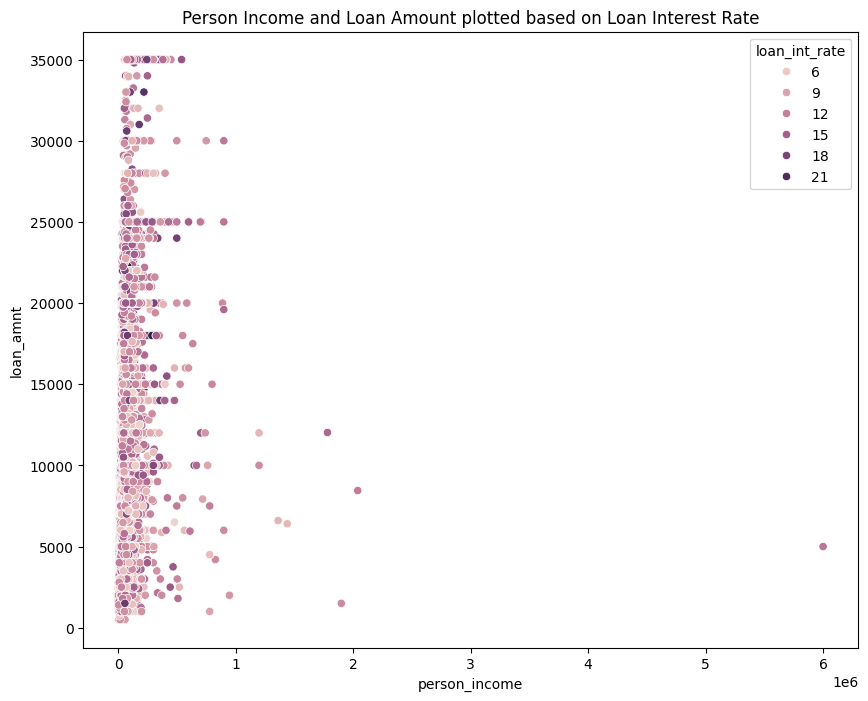

In [26]:
plt.figure(figsize=(10,8)) 
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_int_rate') #Scatterplot for multi_variate
plt.title('Person Income and Loan Amount plotted based on Loan Interest Rate')
plt.show()

## (x) Checking Correlation for Numerical Features

Text(0.5, 1.0, 'Correlation Matrix')

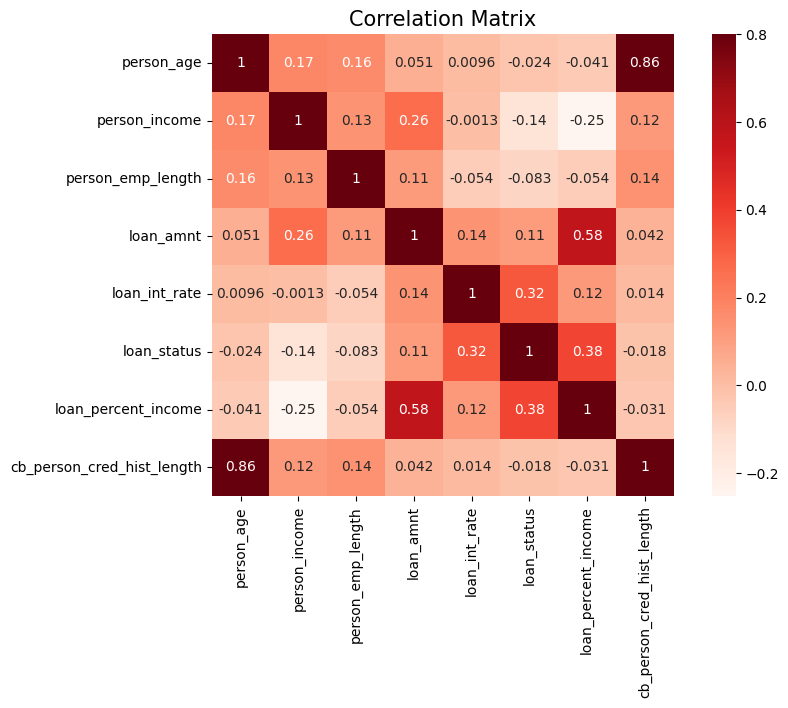

In [27]:
all_numeric_df = df.select_dtypes(include=[np.number]) # selects rows only having dtype: number
plt.figure(figsize=(10, 6))
sns.heatmap(all_numeric_df.corr(), vmax =.8, square = True, annot = True,cmap='Reds' ) #Plotting heatmap with correlation matrix of df
plt.title('Correlation Matrix',fontsize=15)

# Cleaning After EDA

## 6) Removing Outliers 

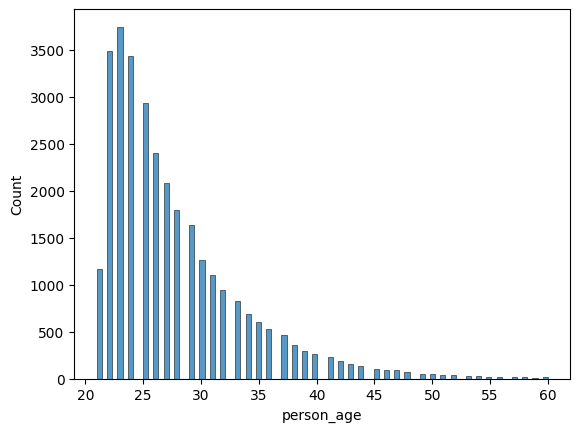

In [28]:
df = df.drop(df[df['person_age'] > 60].index, axis=0) #Dropping rows with person_age > 60
df = df.drop(df[df['person_age'] < 21].index, axis=0) #Dropping rows with person_age < 21
sns.histplot(data= df, x ='person_age', multiple = 'stack') #histogram plot
plt.show()

## Using z-score to remove outliers

In [29]:
numerical_cols = ['person_income','person_emp_length','loan_int_rate'] #Numerical columns
                    
# for column in numerical_cols:
#     z_score = stats.zscore(df[column]) #Calcualtes z-score from stats for each column
#     df = df[np.abs(z_score) < 3]  #Considering rows only having values z-score < 3

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31445.000000,3.144500e+04,31445.000000,31445.000000,31445.000000,31445.000000,31445.000000,31445.000000
mean,27.666751,6.642607e+04,4.787852,9658.972810,11.042186,0.215901,0.169649,5.779583
std,5.965951,5.186924e+04,4.130172,6329.202902,3.071762,0.411452,0.106303,3.978185
min,21.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.933600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,11.017265,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,60.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## 7) Feature Engineering

## Adding a new feature called Person_Age_Group from the existing feature person_age 

In [30]:
bins = [20,26,31,36,41,46,51,56,60] #Creating bins for categories
labels = ['Age:21-25','Age:26-30','Age:31-35','Age:36-40','Age:41-45','Age:46-50','Age:51-55','Age:56-60'] #Age groups
df['Person_Age_Group'] = pd.cut(df['person_age'], bins = bins,labels = labels) #Mapping bins to categories using cut
df.drop(['person_age'], inplace = True, axis = 1) #Dropping person_age column
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,Person_Age_Group
0,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3,Age:21-25
1,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2,Age:21-25
2,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3,Age:21-25
3,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2,Age:21-25
4,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4,Age:21-25
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,65004,RENT,4,PERSONAL,D,20000,15.58,1,0.31,Y,19,Age:51-55
32575,64500,RENT,0,EDUCATION,B,5000,11.26,0,0.08,N,20,Age:51-55
32576,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30,Age:56-60
32577,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19,Age:51-55


## 8) Feature Selection - Removing Feature 'cb_person_cred_hist_length' due to high correlation

In [31]:
df.drop('cb_person_cred_hist_length', axis = 1, inplace =  True) #drop column and make changes in same df by putting inplace = True
df.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'Person_Age_Group'],
      dtype='object')

## 9) Changing Categorical Data to Numeric Data

In [32]:
categorical_cols = df.select_dtypes(include=['category']).columns # selects rows only having dtype: category
df_new = df.copy()
df_new = pd.get_dummies(df_new, columns=categorical_cols, drop_first=False,dtype=int) #Creates dummy columns based on total number of categories in that column

## 10) Handling Imbalance in Data

In [42]:
# Seperating target variable(Y) to form X
y = df_new['loan_status']
X = df_new.drop('loan_status', axis=1) 

In [43]:
X.shape

(31445, 32)

In [44]:
oversample = SMOTE() 
X, y = oversample.fit_resample(X, y) #Using SMOTE to oversample minority class samples and balance dataset
X.shape

(49312, 32)

## 11) Scaling Data

In [45]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-2.42999460e-02,  3.02955418e+01,  3.74927044e+00, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-1.07828965e+00,  1.63955397e-01, -1.37530139e+00, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-1.07828965e+00, -8.57454311e-01, -6.97049239e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       ...,
       [-6.43038844e-01,  6.74660252e-01, -1.87970849e-02, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-9.63076204e-01, -8.57454311e-01, -8.66612278e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-5.66229877e-01, -6.02101884e-01,  2.82648317e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02]])

In [46]:
import pickle

f = open('X.pckl', 'wb')
pickle.dump(scaled_X, f)
f.close()

f = open('y.pckl', 'wb')
pickle.dump(y, f)
f.close()



In [47]:
scaled_X

array([[-2.42999460e-02,  3.02955418e+01,  3.74927044e+00, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-1.07828965e+00,  1.63955397e-01, -1.37530139e+00, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-1.07828965e+00, -8.57454311e-01, -6.97049239e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       ...,
       [-6.43038844e-01,  6.74660252e-01, -1.87970849e-02, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-9.63076204e-01, -8.57454311e-01, -8.66612278e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02],
       [-5.66229877e-01, -6.02101884e-01,  2.82648317e-01, ...,
        -7.88898011e-02, -5.14124835e-02, -3.34154540e-02]])

In [48]:
y

0        1
1        0
2        1
3        1
4        1
        ..
49307    1
49308    1
49309    1
49310    1
49311    1
Name: loan_status, Length: 49312, dtype: int64

## Data ready for training!

In [50]:
column_names = list(df_new.columns)

In [54]:
import pickle
with open('col_names.pickle', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(column_names, f)